In [31]:
import numpy as np
import matplotlib.pyplot as plt

## Input variabel 

In [32]:
jumlah_permintaan = float(input("Masukkan jumlah permintaan: "))
jumlah_persediaan = float(input("Masukkan jumlah persediaan: "))
min_permintaan = float(input("Min permintaan: "))
min_persediaan = float(input("Min persediaan: "))
min_produksi = float(input("Min produksi: "))
max_permintaan = float(input("Max permintaan: "))
max_persediaan = float(input("Max persediaan: "))
max_produksi = float(input("Max produksi: "))

Masukkan jumlah permintaan: 4000
Masukkan jumlah persediaan: 300
Min permintaan: 1000
Min persediaan: 100
Min produksi: 2000
Max permintaan: 5000
Max persediaan: 600
Max produksi: 7000


## Fuzzyfikasi

In [76]:
#permintaan
uTurun = (max_permintaan - jumlah_permintaan) / (max_permintaan - min_permintaan) 
uNaik = (jumlah_permintaan - min_permintaan) / (max_permintaan - min_permintaan)

#persediaan barang
uSedikit = (max_persediaan - jumlah_persediaan) / (max_persediaan - min_persediaan) 
uBanyak = (jumlah_persediaan - min_persediaan) / (max_persediaan - min_persediaan)

In [64]:
#fungsi keanggotaan
def permintaan_turun(x):
    return (max_permintaan - x) / (max_permintaan - min_permintaan)

def permintaan_naik(x):
    return (x - min_permintaan) / (max_permintaan - min_permintaan)

def persediaan_sedikit(x):
    return (max_persediaan - x) / (max_persediaan - min_persediaan)

def persediaan_banyak(x):
    return (x - min_persediaan) / (max_persediaan - min_persediaan)

def produksi_sedikit(x):
    return (max_produksi - x) / (max_produksi - min_produksi)

def produksi_banyak(x):
    return (x - min_produksi) / (max_produksi - min_produksi)

## Operasi Fuzzy

In [34]:
R1 = np.min([uTurun, uBanyak])
R2 = np.min([uTurun, uSedikit])
R3 = np.min([uNaik, uBanyak])
R4 = np.min([uNaik, uSedikit])

## Implikasi

In [35]:
#jika permitaan turun dan persediaan barang banyak maka berkurang
#jika permintaan turun dan persediaan barang sedikit maka berkurang
#jika permintaan naik dan persediaan barang banyak maka bertambah
#jika permintaan naik dan persediaan barang sedikit maka bertambah
berkurang = np.array([R1, R2])
bertambah = np.array([R3, R4])

## Komposisi aturan

In [36]:
v_bertambah = np.max(bertambah)
v_berkurang = np.max(berkurang)

## Defuzzifikasi

In [37]:
dfNaik = []
dfTurun = []
for i in range(5):
    dfNaik.append(np.random.randint(min_produksi, max_produksi))
    dfTurun.append(np.random.randint(min_produksi, max_produksi))

In [84]:
hasilAkhir = ((np.sum(dfNaik) * v_bertambah) + (np.sum(dfTurun) * v_berkurang)) / ((5 * v_bertambah) + (5 * v_berkurang))

In [85]:
np.round(hasilAkhir, 2)

4286.88

In [69]:
x1 = np.array([min_permintaan,max_permintaan])

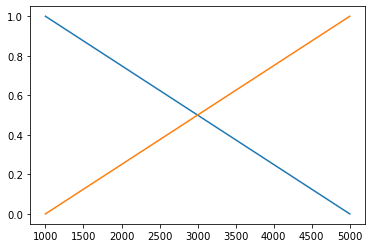

In [70]:
plt.plot(x1, permintaan_turun(x1))
plt.plot(x1, permintaan_naik(x1))

In [71]:
x2 = np.array([min_persediaan, max_persediaan])

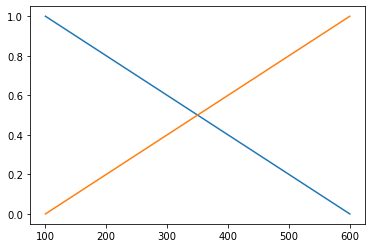

In [73]:
plt.plot(x2, persediaan_sedikit(x2))
plt.plot(x2, persediaan_banyak(x2))

In [74]:
x3 = np.array([min_produksi, max_produksi])

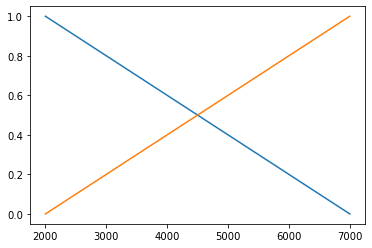

In [75]:
plt.plot(x3, produksi_sedikit(x3))
plt.plot(x3, produksi_banyak(x3))

In [79]:
print(uTurun)
print(uNaik)
print(uSedikit)
print(uBanyak)

0.25
0.75
0.6
0.4


In [80]:
print(R1)
print(R2)
print(R3)
print(R4)

0.25
0.25
0.4
0.6


In [81]:
print(v_bertambah)
print(v_berkurang)

0.6
0.25


In [83]:
print("Bertambah: ",dfNaik)
print("Berkurang: ",dfTurun)

Bertambah:  [5105, 2423, 5657, 3037, 5998]
Berkurang:  [2608, 3976, 4682, 2725, 5558]
